In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from load_config import load_config
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.delta import Delta
from v2.strategy.indicators.notebook_utils import fetchIndicators, genDataForAll
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing


In [2]:


def filter_optimal(optimal):
    # if optimal > 0.75:
    #     return 1.0
    if optimal < -0.75:
         return 1.0
    else:
        return 0.0


model = Trading(load_config('config.hjson'))

dataset_list = []
for d in model.dfs:
    print(d[1])
    cur_dataset = d[0]
    my_inds = fetchIndicators(["rsi", "macd", "stochastic_oscillator", "optimal_v2"], param_specification={
        'macd.signal': 360,
        'macd.ema_slow': 480,
        'macd.ema_fast': 240,
        'ema.period': 360,
        'sma.period': 360,
        'stochastic_oscillator.highlow': 360,
        'stochastic_oscillator.k': 1080,
        'rsi.period': 360,
        'bollinger_bands.period': 360
    })
    genDataForAll(cur_dataset, my_inds)
    cur_dataset.dropna(inplace=True)

    delta_5 = Delta(_params=[Param(0,0,0,'period', 5)], _appended_name='RSI_5')
    delta_1 = Delta(_params=[Param(0,0,0,'period', 1)], _appended_name='RSI_1')
    delta_10 = Delta(_params=[Param(0,0,0,'period',10)], _appended_name='RSI_10')
    delta_60 = Delta(_params=[Param(0,0,0,'period', 60)], _appended_name='RSI_60')
    delta_1.genData(cur_dataset, gen_new_values=False, value='RSI')
    delta_5.genData(cur_dataset, gen_new_values=False, value='RSI')
    delta_10.genData(cur_dataset, gen_new_values=False, value='RSI')
    delta_60.genData(cur_dataset, gen_new_values=False, value='RSI')
    delta_5 = Delta(_params=[Param(0,0,0,'period', 5)], _appended_name='MACD_5')
    delta_1 = Delta(_params=[Param(0,0,0,'period', 1)], _appended_name='MACD_1')
    delta_10 = Delta(_params=[Param(0,0,0,'period',10)], _appended_name='MACD_10')
    delta_60 = Delta(_params=[Param(0,0,0,'period', 60)], _appended_name='MACD_60')
    delta_1.genData(cur_dataset, gen_new_values=False, value='MACD')
    delta_5.genData(cur_dataset, gen_new_values=False, value='MACD')
    delta_10.genData(cur_dataset, gen_new_values=False, value='MACD')
    delta_60.genData(cur_dataset, gen_new_values=False, value='MACD')
    delta_5 = Delta(_params=[Param(0,0,0,'period', 5)], _appended_name='close_5')
    delta_1 = Delta(_params=[Param(0,0,0,'period', 1)], _appended_name='close_1')
    delta_10 = Delta(_params=[Param(0,0,0,'period',10)], _appended_name='close_10')
    delta_60 = Delta(_params=[Param(0,0,0,'period', 60)], _appended_name='close_60')
    delta_1.genData(cur_dataset, gen_new_values=False, value='close')
    delta_5.genData(cur_dataset, gen_new_values=False, value='close')
    delta_10.genData(cur_dataset, gen_new_values=False, value='close')
    delta_60.genData(cur_dataset, gen_new_values=False, value='close')
    delta_5 = Delta(_params=[Param(0,0,0,'period', 5)], _appended_name='stosc_k_5')
    delta_1 = Delta(_params=[Param(0,0,0,'period', 1)], _appended_name='stosc_k_1')
    delta_10 = Delta(_params=[Param(0,0,0,'period',10)], _appended_name='stosc_k_10')
    delta_60 = Delta(_params=[Param(0,0,0,'period', 60)], _appended_name='stosc_k_60')
    delta_1.genData(cur_dataset, gen_new_values=False, value='stosc_k')
    delta_5.genData(cur_dataset, gen_new_values=False, value='stosc_k')
    delta_10.genData(cur_dataset, gen_new_values=False, value='stosc_k')
    delta_60.genData(cur_dataset, gen_new_values=False, value='stosc_k')
    
    mm_scalar = MinMaxScaler()
    
    cur_dataset.dropna(inplace=True)
    cur_dataset[["RSI", "MACD", "stosc_k", "stosc_d", "Delta_MACD_1", "Delta_MACD_5", "Delta_MACD_10", "Delta_MACD_60", "Delta_RSI_1", "Delta_RSI_5", "Delta_RSI_10", "Delta_RSI_60", "Delta_close_1", "Delta_close_5", "Delta_close_10", "Delta_close_60"]] = mm_scalar.fit_transform(cur_dataset[["RSI", "MACD", "stosc_k", "stosc_d", "Delta_MACD_1", "Delta_MACD_5", "Delta_MACD_10", "Delta_MACD_60", "Delta_RSI_1", "Delta_RSI_5", "Delta_RSI_10", "Delta_RSI_60", "Delta_close_1", "Delta_close_5", "Delta_close_10", "Delta_close_60"]])
    cur_dataset['optimal'] = cur_dataset.apply(lambda x: filter_optimal(x.optimal), axis=1)
    dataset_list.append(cur_dataset)
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




XBTUSD
ETHUSD
XRPUSD
LTCUSD
BCHUSD


In [3]:
cur_dataset

,time,open,high,low,close,volume,trades,rsi_diff,rsi_u,rsi_d,...,Delta_close_10,Delta_close_60,Delta_stosc_k_1,Delta_stosc_k_5,Delta_stosc_k_10,Delta_stosc_k_60,Delta_stosc_d_1,Delta_stosc_d_5,Delta_stosc_d_10,Delta_stosc_d_60
138668,1514922300,2610.0,2610.0,2610.0,2610.257423,0.052565,1,0.0,0.0,0.0,...,0.519636,0.324089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
138669,1514922660,2610.0,2615.0,2610.0,2612.628711,1.000000,2,5.0,5.0,0.0,...,0.519636,0.324089,-0.040617,0.000000,0.000000,0.000000,-0.000209,0.000000,0.000000,0.000000
138670,1514922780,2614.8,2620.0,2614.8,2616.314356,7.675162,6,5.0,5.0,0.0,...,0.519636,0.324089,-0.042337,0.000000,0.000000,0.000000,-0.000517,0.000000,0.000000,0.000000
138671,1514922840,2620.0,2620.0,2620.0,2618.157178,0.045600,1,0.0,0.0,0.0,...,0.519636,0.324089,0.000000,0.000000,0.000000,0.000000,-0.000418,0.000000,0.000000,0.000000
138672,1514922900,2620.0,2620.0,2620.0,2619.078589,0.058000,1,0.0,0.0,0.0,...,0.519636,0.324089,0.000000,0.000000,0.000000,0.000000,-0.000517,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743178,1593560340,222.4,222.4,222.3,222.281119,0.000059,2,-0.1,0.0,0.1,...,0.529267,0.330047,0.043478,-0.111111,-0.172414,-0.318182,0.000808,0.004267,0.009532,0.075555
743179,1593560580,222.4,222.4,222.4,222.340559,6.996256,1,0.1,0.1,0.0,...,0.530710,0.330584,-0.041667,-0.148148,-0.258065,-0.361111,0.000766,0.004095,0.009245,0.074670
743180,1593560640,222.7,222.7,222.7,222.520280,0.000202,1,0.3,0.3,0.0,...,0.532994,0.331810,-0.130435,-0.259259,-0.333333,-0.444444,0.000639,0.003795,0.008827,0.073653
743181,1593561300,222.6,222.6,222.6,222.560140,16.000000,4,-0.1,0.0,0.1,...,0.533353,0.332104,0.050000,-0.125000,-0.300000,-0.416667,0.000681,0.003666,0.008452,0.072726


In [4]:
final_dataset = pd.concat(dataset_list)

In [5]:


train, test = train_test_split(final_dataset, test_size=0.05, shuffle=False)


<h3>Models</h3>
<p>Random Forest</p>
<p>Fine tuned RF</p>
<p>Gradient boost</p>
<p>GB inside RF</p>
<p>RF inside GB</p>
<p>LSTM</p>

In [6]:

buy_signals = train[train['optimal'] == 1.0]

In [7]:
mean_num_singals = int(len(buy_signals))

In [8]:
not_signals = train[train['optimal'] == 0.0]


In [9]:
print(mean_num_singals, len(not_signals))

139609 3597155


In [10]:
not_signals_sampled = not_signals.sample(n=mean_num_singals * 8, random_state=69420, axis=0)
not_signals_sampled = not_signals_sampled.sample(frac=1)

In [11]:

balanced_data_buy = pd.concat([not_signals_sampled, buy_signals])

In [12]:
# filtered_balanced_data_buy = balanced_data_buy[["close", "stosc_k", "stosc_d", "slope", 'rsi']]
filtered_balanced_data_buy = balanced_data_buy[["RSI", "MACD", "stosc_k", "stosc_d", "Delta_MACD_1", "Delta_MACD_5", "Delta_MACD_10", "Delta_MACD_60", "Delta_RSI_1", "Delta_RSI_5", "Delta_RSI_10", "Delta_RSI_60", "Delta_close_1", "Delta_close_5", "Delta_close_10", "Delta_close_60"]]




balanced_data_optimal_buy = balanced_data_buy[['optimal']]



In [13]:

clf_buy = RandomForestClassifier(random_state=69420, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)

clf_buy.fit(filtered_balanced_data_buy, balanced_data_optimal_buy)

RandomForestClassifier(min_samples_leaf=2, n_jobs=-1, random_state=69420)

In [14]:
def insert_buys(close, prediction):
    if prediction == 1:
        return close
    else:
        return None

def insert_sells(close, prediction):
    if prediction == -1:
        return close
    else:
        return None



In [15]:
import pickle

In [16]:
filtered_test = test[["close", 'optimal']]
filtered_test_2 = test[["RSI", "MACD", "stosc_k", "stosc_d", "Delta_MACD_1", "Delta_MACD_5", "Delta_MACD_10", "Delta_MACD_60", "Delta_RSI_1", "Delta_RSI_5", "Delta_RSI_10", "Delta_RSI_60", "Delta_close_1", "Delta_close_5", "Delta_close_10", "Delta_close_60"]]

In [17]:
# filtered_sell = test[["close", "rsi", "MACD", "stosc_k", "stosc_d", "slope", "variance"]]

In [18]:
# sell_model = pickle.load(open('./v2/strategy/saved_models/optimal_v2_sell_rf.sav', 'rb'))

In [19]:
filtered_test['predict_buy'] = clf_buy.predict(filtered_test_2.values)
# filtered_test['predict_sell'] = sell_model.predict(filtered_sell)

In [20]:
len(filtered_test)

196672

In [21]:
len(filtered_test[filtered_test['predict_buy'] != 0.0])

2497

In [22]:

filtered_test['buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.predict_buy), axis=1)
filtered_test['optimal_buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.optimal), axis=1)
# filtered_test['sell'] = filtered_test.apply(lambda x: insert_sells(x.close, x.predict_sell), axis=1)



In [23]:
reset_filtered = filtered_test.reset_index(drop=True)

In [24]:
# reset_filtered

In [25]:
# reset_filtered['count'] = reset_filtered['sell'].rolling(60).count() - reset_filtered['buy'].rolling(60).count() 

In [26]:
# reset_filtered

In [27]:
first_amnt = reset_filtered[15000:16000]

<Figure size 432x288 with 0 Axes>

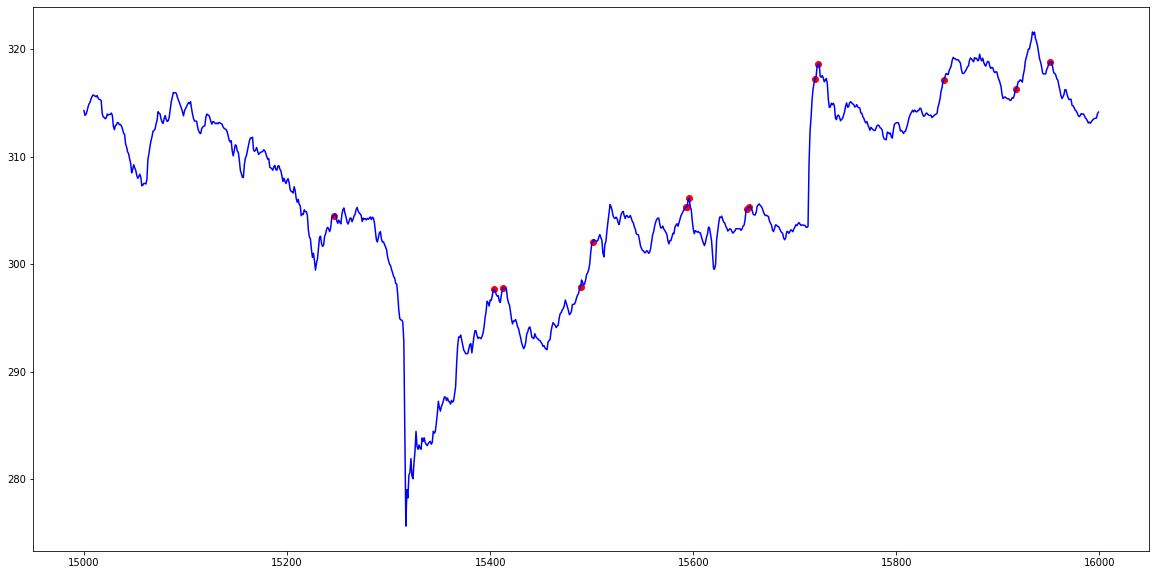

In [28]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(x=first_amnt.index, y=first_amnt['buy'], color='red')
# plt.scatter(x=first_amnt.index, y=first_amnt['optimal_buy'], color='purple')

# plt.scatter(x=first_amnt.index, y=first_amnt['sell'], color='green')

plt.plot(first_amnt.index, first_amnt['close'], color='blue')
plt.show()

In [29]:
# plt.figure(figsize=(20,10))
# plt.plot(first_amnt.index, first_amnt['count'].rolling(480).mean(), color='purple')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(1440).mean(), color='blue')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(4320).mean(), color='orange')
# plt.show()

In [30]:
with open('./peak_model_v3.pickle', 'wb') as handle:
    pickle.dump(clf_buy, handle, protocol=pickle.HIGHEST_PROTOCOL)